In [1]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [2]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [3]:
import pandas as pd

from collections import Counter

import itertools

In [4]:
import sympy as sym

In [5]:
import os

In [6]:
os.chdir("/Users/glynatsi/rsc/reactive-two-bits/")

In [7]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

from main import *

In [8]:
eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from eq import *

In [9]:
colors = ["tab:green", "tab:purple"]

In [10]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

### Numerical Nash

In [11]:
eq = pd.read_csv("data/equilibria_from_large_search.csv")

In [13]:
eq['ID'].nunique()

3837

In [14]:
def N0(p):
    return 2 * p[3] - 1

def N13107(p):
    return p[1] + p[2] -  3 / 2

In [20]:
x = np.arange(0, 1, 0.03)

y1 = np.arange(0.47, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y1)

z = (3 / 2)  - yy1

y2 = np.arange(0, 1, 0.03)

xx2, yy2 = np.meshgrid(x, y2)

z2 = xx2 * 0 + yy2 * 0 + 1 / 2


y3 = np.arange(0.85, 1, 0.03)
xx3, yy3 = np.meshgrid(x, y3)

z3 = (13  - 7 * yy3) / 7

z4 = xx2 * 0 + yy2 * 0 + 6 / 7

In [21]:
custom_lines = [Line2D([0], [0], linestyle='--', color='black'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor="#0072B2", markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor="#D55E00", markersize=10, alpha=.55)]

### Original Plot

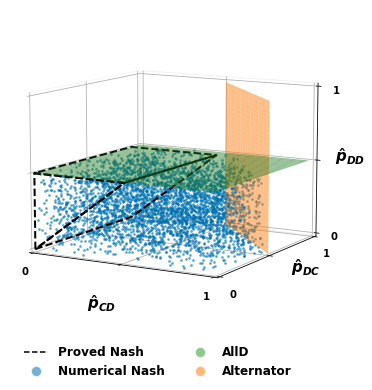

In [33]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]
    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors="#999999",
                                     linewidths=2,
                                     linestyle='--',
                                     edgecolors='black',
                                     alpha=0.0))

ax1.plot_surface(xx2, yy2, z2, alpha=0.5, color="tab:green")
ax1.plot_surface(z, yy1, xx1, alpha=0.5, color='tab:orange')

for i, row in eq[['p2', 'p5', 'p6']].round(2).iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color="#0072B2", s=3, alpha=0.5)
        
for ax in axes:
    ax.view_init(10, -60)
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$\hat{p}_{CD}$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$\hat{p}_{DC}$", (.065, -0.06), fontsize=15)
    ax.annotate("$\hat{p}_{DD}$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    

ax1.legend(custom_lines, ['Proved Nash',
                          'Numerical Nash',
                          'AllD', 'Alternator'], bbox_to_anchor=(.9, 0), 
           ncol=2, framealpha=0, fontsize=12);

plt.savefig("static/for_akin.pdf", bbox_inches='tight')

### Without Analytical

In [22]:
custom_lines_no_proved = [
                Line2D([0], [0], marker='o', color='w', markerfacecolor="#0072B2", markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor="#D55E00", markersize=10, alpha=.55)]

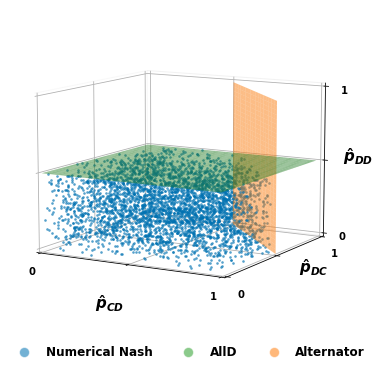

In [35]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]

ax1.plot_surface(xx2, yy2, z2, alpha=0.5, color="tab:green")
ax1.plot_surface(z, yy1, xx1, alpha=0.5, color='tab:orange')

for i, row in eq[['p2', 'p5', 'p6']].round(2).iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color="#0072B2", s=3, alpha=0.5)
        
for ax in axes:
    ax.view_init(10, -60)
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$\hat{p}_{CD}$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$\hat{p}_{DC}$", (.065, -0.06), fontsize=15)
    ax.annotate("$\hat{p}_{DD}$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    

ax1.legend(custom_lines_no_proved, ['Numerical Nash',
                          'AllD', 'Alternator'], bbox_to_anchor=(1.1, 0), 
           ncol=3, framealpha=0, fontsize=12);

plt.savefig("static/for_akin_no_proved_area.pdf", bbox_inches='tight')

### Non equilibria plot

In [11]:
columns = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "b", "c"]
)

In [12]:
files = glob.glob("data/big_data/*.csv")

In [24]:
dfs = [pd.read_csv(file, names=columns, index_col=0) for file in files[:10000]]

In [25]:
df = pd.concat(dfs)

In [26]:
eqs, noneqs = seperate_equilibria_and_non(df)

In [27]:
noneqs = noneqs.reset_index(drop=True)

In [28]:
scatter_points = noneqs[['p2', 'p5', 'p6']].drop_duplicates().round(3).values

In [29]:
scatter_points.shape

(5398, 3)

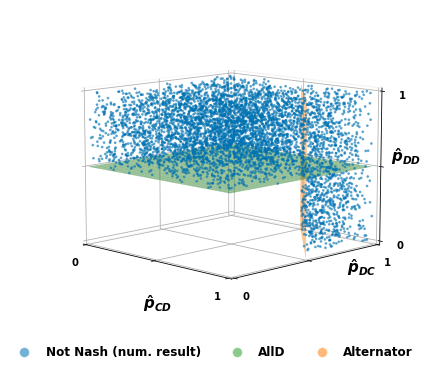

In [30]:
fig = plt.figure(figsize=(20, 30))

ax1 = fig.add_subplot(131, projection='3d')


ax1.plot_surface(xx2, yy2, z2, alpha=0.5, color="tab:green")
ax1.plot_surface(z, yy1, xx1, alpha=0.5, color='tab:orange')

ax1.scatter(scatter_points[:, 0], scatter_points[:, 1], scatter_points[:, 2],
            color="#0072B2", s=3, alpha=0.5)
        
ax1.view_init(10, -45)

ax1.set_xlim(0, 1);
ax1.set_ylim(0, 1);
ax1.set_zlim(0, 1);

ax1.set_xticks([0, .5, 1])
ax1.set_yticks([0, .5, 1])
ax1.set_zticks([0, .5, 1])

ax1.set_xticklabels([0, "", 1])
ax1.set_yticklabels([0, "", 1])
ax1.set_zticklabels([0, "", 1])


ax1.annotate("$\hat{p}_{CD}$", (-0.05, -0.08), fontsize=15)
ax1.annotate("$\hat{p}_{DC}$", (.065, -0.06), fontsize=15)
ax1.annotate("$\hat{p}_{DD}$", (.09, 0.003), fontsize=15)


ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
    

ax1.legend(custom_lines_no_proved, ['Not Nash (num. result)',
                          'AllD', 'Alternator'], bbox_to_anchor=(1.1, 0), 
           ncol=3, framealpha=0, fontsize=12);

plt.savefig("static/for_akin_non_nash.pdf", bbox_inches='tight')

In [72]:
df['c'].unique(), df['b'].unique()

(array([1]), array([2]))

In [85]:
for i, row in noneqs[['ID','p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    
    A = row['p6'] > 1 - 1 / 2
    B = (row['p2'] + row['p5']) / 2 > 1 - (1 / 2 * 2)
    
    assert A or B

In [81]:
(row['p2'] + row['p5']), 1 + (2 - 1) / 1

(1.87168, 2.0)

In [74]:
B, A

(False, False)

In [76]:
row, i

(ID    3555.00000
 p2       0.87678
 p5       0.99490
 p6       0.19770
 Name: 3, dtype: float64,
 3)

In [79]:
scatter_points[3, :]

array([0.877, 0.995, 0.198])

In [63]:
(row['p2'] + row['p5']), 1 + (2 - 1) / 1

(1.87168, 2.0)